## **Importing Data**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [90]:
#checking head of the data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [91]:
#Dataset Size
len(airbnb)

48895

In [92]:
#Dataset type
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **Cleaning Data**

In [93]:
#Find the null values from the dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In the dataset, 'name', 'host_name', 'last_review', and 'reviews_per_month' contain NA. 'name', 'host_name', 'last_review are irrelevant to our data analysis, so we will simply drop these variables. We will replace null values in column 'reviews_per_month' with 0.

In [94]:
#Processing the dataset
airbnb.drop(['id','host_name','last_review'],axis=1,inplace =True)
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#Checking the null values after processing
airbnb.reviews_per_month.isnull().sum()

0

In [95]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Distribution of Price for Each Neighbourhood Group

In [96]:
#Subset price by neighbourhood
#Brooklyn
price_1 = airbnb.loc[airbnb['neighbourhood_group']=='Brooklyn'][['price']]
#Manhattan
price_2 = airbnb.loc[airbnb['neighbourhood_group']=='Manhattan'][['price']]
#Queens
price_3=airbnb.loc[airbnb['neighbourhood_group']=='Queens'][['price']]
#Staten Island
price_4=airbnb.loc[airbnb['neighbourhood_group']=='Staten Island'][['price']]
#Bronx
price_5=airbnb.loc[airbnb['neighbourhood_group']=='Bronx'][['price']]

In [ ]:
price_nei = [price_1,price_2,price_3,price_4,price_5]

In [ ]:
price_dis = []
#Appending statistics for price range to the list
nei_list = ['Brooklyn', 'Manhattan', 'Queens','Staten Island','Bronx']
for x in price_nei:
    i = x.describe(percentiles = [.25, .50,.75])
    i = i.iloc[3:]
    i.reset_index(inplace =True)
    i.rename(columns={'index':'Stats'},inplace =True)
    price_dis.append(i)

In [ ]:
#Changing names
price_dis[0].rename(columns={'price':nei_list[0]},inplace=True)
price_dis[1].rename(columns={'price':nei_list[1]}, inplace=True)
price_dis[2].rename(columns={'price':nei_list[2]}, inplace=True)
price_dis[3].rename(columns={'price':nei_list[3]}, inplace=True)
price_dis[4].rename(columns={'price':nei_list[4]}, inplace=True)

#final review

price_dis=[df.set_index('Stats') for df in price_dis]

In [ ]:
price_dis=price_dis[0].join(price_dis[1:])
price_dis

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


We need to drop some extreme values to make the plot clear.

Text(0.5, 1.0, 'Density and distribution of price for each neighborhood_group')

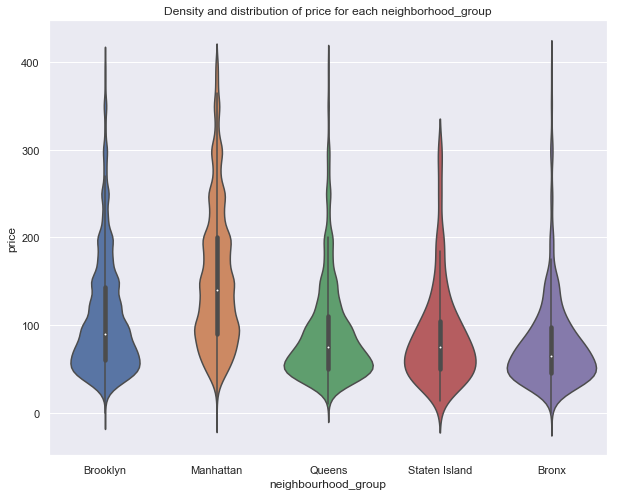

In [ ]:
#visualize price distribution
data_1=airbnb[airbnb.price<400]
sns.set(rc={'figure.figsize':(10,8)})
price_dis_v=sns.violinplot(data=data_1,x='neighbourhood_group', y='price')
price_dis_v.set_title('Density and distribution of price for each neighborhood_group')

We can learn from the result that Manhattan has the highest range of prices of listings with the average price of $150, followed by Brooklyn($90). Queens and Bronx have similar statistic distribution of prices. Listings in Bronx has the lowest average price.

Now let's take a further look at the distribution of listings for top 10 neighbourhoods, taking room type into account.

In [ ]:
#top 10 neighbourhoods
nei_10 = airbnb.neighbourhood.value_counts().head(10)
nei_10 = nei_10.reset_index()
data_2=airbnb.loc[airbnb['neighbourhood'].isin(nei_10['index'])]

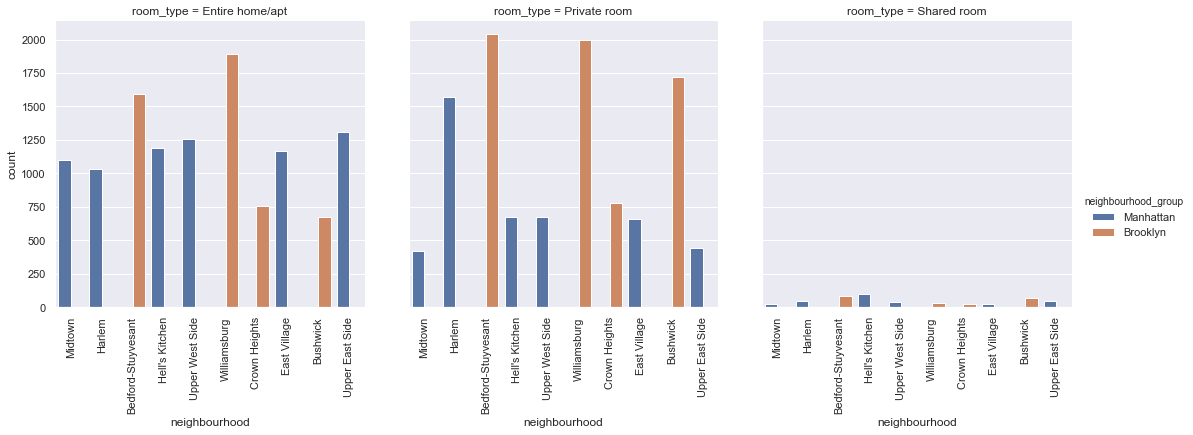

In [ ]:
#catplot
nei_v = sns.catplot(x='neighbourhood',hue='neighbourhood_group',col='room_type',data=data_2,kind='count')
nei_v.set_xticklabels(rotation=90)

These three plots depict the number of rooms for top 10 neighbourhood by room type and by neighourhood_group.
Compared with entire homes and private rooms, shared rooms have the smallest portion.
Bedford-Stuyvesant and Williamsburg are the most popular neighbourhood for Manhattan borough(both entire home and private room). It's interesting that Bushwick is more popular for private room than entire home.
In general, Harlem is the most popular neighbourhood for Brooklyn group.

## Availability Visualization (longtitude and latitude)

In [ ]:
a_v =data_1.plot(kind='scatter',x='longitude',y='latitude',label='availability_365',c='price',
                 cmap=plt.get_cmap('rainbow'),colorbar=True,alpha=0.4,figsize=(10,8))
a_v.legend()

## Top Listing Words

In [ ]:
str_names=[]
for name in airbnb.name:
    str_names.append(name)
def split_name(name):
    spl=str(name).split()
    return spl
count_names = []
for x in str_names:
    for word in split_name(x):
        word=word.lower()
        count_names.append(word)

In [ ]:
from collections import Counter
#let's see top 15 listing words
top15_w=Counter(count_names).most_common()
top15_w=top15_w[0:15]

In [ ]:
data_3=pd.DataFrame(top15_w)
data_3.rename(columns={0:'Words', 1:'Count'}, inplace=True)

In [ ]:
top_words=sns.barplot(x='Words', y='Count', data=data_3)
top_words.set_ylabel('Count of words')
top_words.set_xlabel('Words')
top_words.set_xticklabels(top_words.get_xticklabels(), rotation=90)

We can learn from the result that hosts tend to use the most precise word to describe their listings. Airbnb's customers come from many countries, they may not be familiar with English, so the best solution for hosts is to describe their listings in a clear, precise way.

## Top Hosts and Top Reviewed Listings

In [ ]:
hosts_count = airbnb.host_id.value_counts()[:11]
f,top_hosts = plt.subplots(figsize=(14,5))
top_hosts = sns.barplot(x = hosts_count.index,y=hosts_count.values)
top_hosts

In [ ]:
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings